# Solving Ordinary Differential Equations (ODE)
#### * Computational Physics
#### * Zhibo Zhang, Physics Department, UMBC

---

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Background: Types and Order of Differential Equations
 A differential equation is a mathematical equation that relates some function with its derivatives. In applications, the functions usually represent physical quantities, the derivatives represent their rates of change, and the equation defines a relationship between the two. Because such relations are extremely common, differential equations play a prominent role in many disciplines including engineering, physics, economics, and biology.
 
#### ODE:
Differetial equations can be categorized as "ordinary differetial equation (ODE)" or "partial differential equation (PDE)". An ordinary differential equation (ODE) is an equation containing a function of one independent variable and its derivatives. The term "ordinary" is used in contrast with the term partial differential equation which may be with respect to more than one independent variable. 


#### PDE:
A partial differential equation (PDE) is a differential equation that contains unknown multivariable functions and their partial derivatives. (This is in contrast to ordinary differential equations, which deal with functions of a single variable and their derivatives.) 

#### Order:
The order of any differential equation is the highest order of the derivative present in the equation.

#### Linear vs. Nonlinear:
A differential equation is linear if the unknown function and its derivatives appear to the power 1 (products of the unknown function and its derivatives are not allowed) and nonlinear otherwise
 

#### Examples:
Identify the type, order and linear vs. nonlinear of the following euqations:

$$ \frac{du}{dx} = cu+x^2. $$

$$  \frac{d^2u}{dx^2} - x\frac{du}{dx} + u = 0. $$
 
$$  \frac{\partial u}{\partial t} + t\frac{\partial u}{\partial x} = 0.  $$

$$  \frac{du}{dx} = u^2 + 4.  $$

$$  \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0.  $$

---

## Introduction to ODE

Differential equations relate functions of one or more variables to their derivatives.  An "ordinary" differential equation (ODE) is an equation containing a function of only **one** independent variable and its derivatives. Solve an ODE is finding such a function whose derivatives satisfy the equation. The order of an ODE refers to the order of the derivatives; e.g., a first order ODE has only first derivatives. A linear ODE has only linear terms for the function of one independent variable and in general its solution can be obtained analytically. By contrast, a nonlinear ODE doesn't have an exact analytical solution and it has to be solved by numerical methods. The equation is referred as partial differential equation when contains a function of more than one independent variable and its derivatives.

There are many examples of ODEs in physics.  Some of them are linear equations with closed form analytic solutions that we can solve by hand.  Nonlinear equations are harder to solve.  Some have solutions that can be expressed analytically in terms of series expansions or integrals, while others have no closed-form solutions and must be solved numerically.  In this section, we will learn the basic numerical techniques for solving ODE and the `Scipy` modules for solving ODE.

### Example 1: Motion under constant force

A simple and well known example of ODE is Newton's second law of motion:

$$ m\frac{\mathrm{d}^2 \mathbf{x}}{\mathrm{d}t^2}(t) = \mathbf{F} $$

$\mathbf{x}$ is the function with a derivative and $t$ is the independent variable. Note that the force, $\mathbf{F}$, can be constant (e.g., the gravitational force) or a function of position, $\mathbf{F}(\mathbf{x}(t))$, (e.g., the force of a spring) or a function of other quantity. If $\mathbf{F}$ is constant or a linear function of $\mathbf{x}$, this equation is a second-order linear ODE. 


Consider a football ball kicked up from an initial height $y_0$ and with initial velocity $v_0$. Determine the equation of motion of the ball in the vertical direction.  

Neglecting the air resistance, Newton's second law of motion applied to this problem for the instants the ball is in the air gives: 

$$ m\frac{\mathrm{d}^2 y}{\mathrm{d}t^2} = -mg $$

Consider $g=9.8m/s^2$, $y_0(t_0=0)=1m$, and $v_0(t_0=0)=20m/s$.

We know the analytical solution for this problem:

$$ y(t) = y_0 + v_0 t - \frac{g}{2}t^2 $$

Let's solve this problem numerically and compare the results.

A second-order ODE can be transformed into two first-order ODE, introducing a new variable:

$$ \dot{y} = v $$
$$ \dot{v} = a $$

And rewriting Newton's second law as a couple of equations:

$$ \left\{
\begin{array}{r}
\frac{\mathrm{d} y}{\mathrm{d}t} = &v, \quad y(t_0) = y_0
\\
\frac{\mathrm{d} v}{\mathrm{d}t} = &-g, \quad v(t_0) = v_0
\end{array}
\right.$$


---

## Numerical methods to solve ODE
When an ODE can't be solved analytically, usually because it's nonlinear, numerical methods are used, i.e.,  numerical integration. A higher-order ODE is usually transformed into a system of first-order ODE and then this system is solved using numerical integration. 

### Euler method

The most simple method to solve an ODE is using the Euler method.  
First, the derivative of $y$ is approximated by:

$$ \dot{y}(t) \approx \frac{y(t+h)-y(t)}{h} $$

Where $h$ is the step size.  
Rearraning the equation above:

$$ y(t+h) \approx y(t) +h\dot{y}(t) $$

And replacing $\dot{y}(t)$:

$$ y(t+h) \approx y(t) +hf(t, y(t)) $$  

The ODE then can be solved starting at $t_0$, which has a known value for $y_0$:

$$ y(t+h) \approx y_0 + hf(t_0, y_0) $$ 

And using the equation recursively for a sequence of values for $t$ $(t_0, t_0+h, t_0+2h, ...)$:

$$ y_{n+1} = y_n + hf(t_n, y_n) $$ 

This is the Euler method to solve an ODE with a known initial value. 


### Runge-Kutta (RK) Methods
The Runge-Kutta methods are a series of numerical methods for solving differential equations and systems of differential equations of which Euler and the Midpoint methods are a subset.  The more refined the approximation procedure used at each step determines the "order" of the method.  Euler is an order 1 method, Midpoint is order 2, and the most commonly used Runge-Kutta Method, RK4, is of order 4.  The distinguishing characteristic of each order method is the error per step associated with it.

RK4 takes the form

$$
y_{i+1} = y_i + \frac{\Delta t}{6} (k_1 + 2k_2 + 2k_3 + k_4)
$$

where 

$$k_1 = f(y_i, t_i) $$

$$k_2 = f(y_i + \frac{\Delta t}{2}k_1, t_i + \frac{1}{2}\Delta t) $$

$$k_3 = f(y_i + \frac{\Delta t}{2}k_2, t_i + \frac{1}{2}\Delta t) $$

$$k_4 = f(y_i + \Delta tk_3, t_i + \Delta t) $$

for an initial value problem specified by $\cfrac{dy}{dt} = f(y,t)$, with $y(t_0) = y_0$.

$y_{i+1}$ is the RK4 approximation of $y(t_{i+1})$, and the next value ($y_{i+1}$) is determined by the present value ($y_i$) plus the weighted average of four increments, where each increment is the product of the size of the interval, $\Delta t$, and an estimated slope specified by function $f$ on the right-hand side of the differential equation.

In averaging the four increments, greater weight is given to the increments at the midpoint. The weights are chosen such that if $f$ is independent of $y$, the problem is equivalent to a simple integral and RK4 reduces to Simpson's Rule.

Many pre-packaged ODE solvers use variations of RK4, often with adaptive techniques.  MATLAB's `ode45` is one example. It uses simultaneously fourth and fifth order RK formulas to make error estimates and adjust the time step accordingly. 

### `Scipy` module for sovling ODE
The `Scipy` module for solving the ODE is scipy.integrate.odeint


In [2]:
from scipy.integrate import odeint


Do you know that scipy's odeint actually wraps up a Fortran 77 library called ODEPACK. The original code is from the early 1980's but much of it was repackaged at the beginning of the 21st century. Its most basic algorithm is called LSODE (Livermore Solver for Ordinary Differential Equations).  odeint uses the adaptive version of LSODE, called LSODA that automatically switches between "stiff" and "non-stiff" integration routines, depending on the characteristics of the solution, and does adaptive time-stepping to achieve a desired level of solution accuracy.

Have you ever heard of Fortran???

It is not uncommon for modern software libraries to have ancient foundations. Writing "wrappers" for well-tested, tried and true functions is often more efficient than starting from scratch in a different language. Fortunately, you do not need to know any Fortran to be able to use odeint. The scipy developers did the hard work for us. We get the speed, power and reliability of the ODEPACK library with the ease of use of the Python programming interface. It's a win-win.

---

#### Solving the Example problem using Eular method
Now, let's use the Euler method to solve the "football" problem above. On the basis of Euler method we can rewrite the equation:

$$ \left\{
\begin{array}{r}
\frac{\mathrm{d} y}{\mathrm{d}t} = &v, \quad y(t_0) = y_0
\\
\frac{\mathrm{d} v}{\mathrm{d}t} = &-g, \quad v(t_0) = v_0
\end{array}
\right.$$

as :
$$ 
y_{n+1} =  y_n + hv(t_n) 
\\
v_{n+1} = v_n + hg
$$


In [10]:
def ball_euler(t_start, t_end, y0, v0, h):
    """
    Inputs:
    t_start: intial time
    t_end: ending time
    y0: intial vertical location
    v0: intial velocity
    h: stepsize
    """

    t, y, v, i = [t_start], [y0], [v0], 0 #intialize the variables 
    g = -9.8  # gravity constant
    
    while t[-1] <= t_end and y[-1] > 0:
        v.append(v[-1] + h*g)
        y.append(y[-1] + h*v[-1])
        i += 1
        t.append(i*h)
        
    return np.array(t), np.array(y), np.array(v)

Initial values:

In [11]:
y0 = 1
v0 = 20

Let's call the function with different step sizes:

In [12]:
t100, y100, v100 = ball_euler(0, 10, y0, v0, 0.1)
t10, y10, v10    = ball_euler(0, 10, y0, v0, 0.01)

Plot some figures to compare with the analytical results

In [13]:
def ball_plots(t100, y100, v100, t10, y10, v10, title):
    """Plots of numerical integration results.
    """
    a = -9.8
    
    fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 5))

    axs[0, 0].plot(t10, y0 + v0*t10 + 0.5*a*t10**2, color=[0, 0, 1, .7], label='Analytical',lw=3)
    axs[0, 0].plot(t100, y100, '--', color=[0, 1, 0, .7], label='h = 100ms',lw=3)
    axs[0, 0].plot(t10, y10, ':', color=[1, 0, 0, .7], label='h =   10ms',lw=3)

    axs[0, 1].plot(t10, v0 + a*t10, color=[0, 0, 1, .5], label='Analytical',lw=3)
    axs[0, 1].plot(t100, v100, '--', color=[0, 1, 0, .7], label='h = 100ms',lw=3)
    axs[0, 1].plot(t10, v10, ':', color=[1, 0, 0, .7], label='h =   10ms',lw=3)

    axs[1, 0].plot(t10, y0 + v0*t10 + 0.5*a*t10**2 - (y0 + v0*t10 + 0.5*a*t10**2),
                   color=[0, 0, 1, .7], label='Analytical',lw=3)
    axs[1, 0].plot(t100, y100 - (y0 + v0*t100 + 0.5*a*t100**2), '--',
                   color=[0, 1, 0, .7], label='h = 100ms',lw=3)
    axs[1, 0].plot(t10, y10 - (y0 + v0*t10 + 0.5*a*t10**2), ':',
                   color=[1, 0, 0, .7], label='h =   10ms',lw=3)

    axs[1, 1].plot(t10, v0 + a*t10 - (v0 + a*t10), color=[0, 0, 1, .7], label='Analytical',lw=3)
    axs[1, 1].plot(t100, v100 - (v0 + a*t100), '--', color=[0, 1, 0, .7], label='h = 100ms',lw=3)
    axs[1, 1].plot(t10, v10 - (v0 + a*t10), ':', color=[1, 0, 0, .7], label='h =   10ms',lw=3)

    ylabel = ['y [m]', 'v [m/s]', 'y error [m]', 'v error [m/s]']
    axs[0, 0].set_xlim(t10[0], t10[-1])
    axs[1, 0].set_xlabel('Time [s]')
    axs[1, 1].set_xlabel('Time [s]')
    axs[0, 1].legend()
    axs = axs.flatten()
    for i, ax in enumerate(axs):
        ax.set_ylabel(ylabel[i])
    plt.suptitle('Kinematics of a soccer ball - %s method'%title, y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

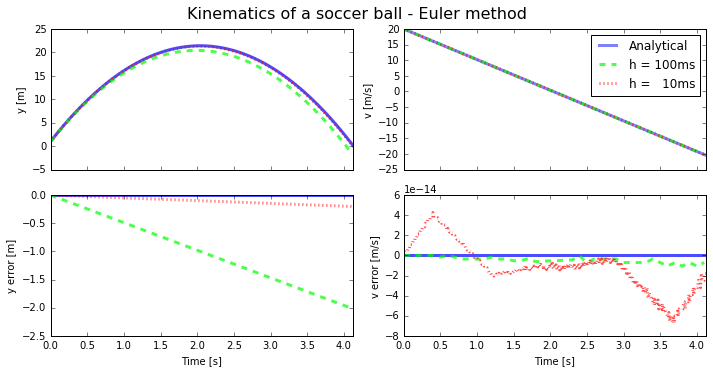

In [14]:
ball_plots(t100, y100, v100, t10, y10, v10, 'Euler')

#### Solving the example problem using Scipy odeint
Let's use the scipy odeint module to solve the problem:

In [22]:
def ball_deriv(yv,t, g):
    y = yv[0]  # position 
    v = yv[1]  # velocity
    a = -g   # acceleration
    return [v, a]

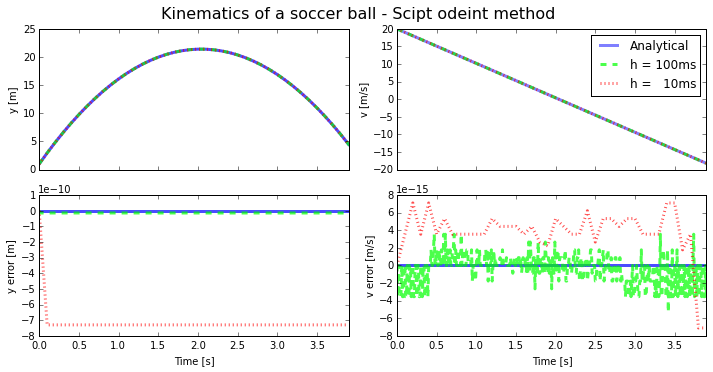

In [23]:
yv0   = [1, 20]
t10   = np.arange(0, 4, 0.1)
g = 9.8
yv10  = odeint(ball_deriv, yv0, t10, args=(g,))
y10, v10 = yv10[:, 0], yv10[:, 1]
t100  = np.arange(0, 4, 0.01)
yv100 = odeint(ball_deriv, yv0, t100, args=(g,))
y100, v100 = yv100[:, 0], yv100[:, 1]

ball_plots(t100, y100, v100, t10, y10, v10, 'Scipt odeint')

### Example 2: Simple pendulum

A simple pendulum involves a second order differential equation that cannot be solved analytically but easy for numerical simulation.  First, let's review the physics:

<img src="SimplePendulum.png" width=400>

If you use Newton's second law to write the sum of the forces on the mass, $m$, you get

$\sum\vec{F} = \vec{T}+\vec{w} = m\vec{a}$

which is a vector expression that needs to be broken up into its components.  Since the length of the pendulum is fixed, the acceleration in the radial direction must be zero, and we need only consider accelerations tangential to the path of the mass, $m$.  Given this, it makes the most sense to use cylindrical coordinates.

$F_{radial} = T - mg\cos\theta = ma_{radial} = 0$

$F_{tangential} = -mg\sin\theta = ma_{tangential}$

The linear acceleration along the tangential direction is related to $\theta$ through the arc-length $s$ that the mass makes as it swings:

$$s = \ell\theta$$

$$
v_{tangential} = \frac{ds}{dt} = \ell \frac{d\theta}{dt}
$$

$$
a_{tangential} = \frac{d^2s}{dt^2} = \ell \frac{d^2\theta}{dt^2}
$$

substituting the above equation to $F_{tangential} = -mg\sin\theta = ma_{tangential}$ gives the following differential equation that we need to solve

$$
\frac{d^2\theta}{dt^2} = -\frac{g}{\ell}\sin\theta
$$

Due to the $\sin\theta$  on the right-hand-side, this has no analytic solution.  So we only have two possible paths forward:

1. Approximate

2. Solve numerically


### Approximate solution

Very often in physics, you can learn a lot about a system by making simplifying assumptions and examining the system's behavior given these assumptions.  In the case of the simple pendulum, we typically restrict the oscillations to **small angles**, $\theta$, which allows us to use the Maclaurin series expansion of $\sin\theta$ and ignore terms higher than order $\mathcal{O}(\theta)$.  Recall

$$
\sin\theta = \theta -\frac{\theta^3}{3!} + \frac{\theta^5}{5!} - \frac{\theta^7}{7!} + ... 
$$

Now we can re-write our differential equation and solve it in closed form:

$$
\frac{d^2\theta}{dt^2} = -\frac{g}{\ell}\theta
$$

Which has solution

$$\theta(t) = \theta_0\cos(\sqrt{g/\ell} t)$$

Let's plot it.

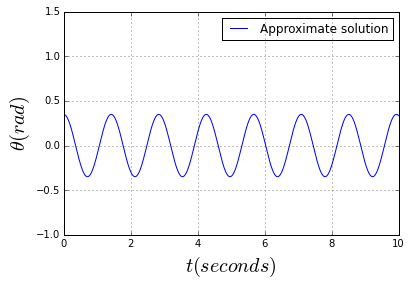

In [24]:
g = 9.8 # gravity constant [m/s^2]
ell = 0.5 # Length of rope [m]
th0 = 20.*np.pi/180 # 20 degrees, but must use radians

t = np.arange(0.,10.+0.01,0.01)
theta_app = lambda t: th0*np.cos(np.sqrt(g/ell)*t)

plt.plot(t,theta_app(t),label='Approximate solution')
plt.xlabel(r'$t (seconds)$',fontsize=20)
plt.ylabel(r'$\theta (rad)$',fontsize=20)
plt.ylim(-1,1.5)
plt.grid()
plt.legend()
plt.show()

Basically what you'd expect.  But this is only good for *small* angles.  What if we wanted to start it out at 50 degrees?  The small-angle approximation will not give us very accurate results.  We have to try something else.

### Numerical Solution

We have learned from the first example that we can greatly simplify the problem by converting our single second-order differential equation into two first order equations.  This can be a tricky concept to grasp, so take a moment to really think about it.  You'll have to keep all the variables and initial conditions straight in order to obtain a solution.

Generally, we use the variable $\omega = d\theta/dt $ to represent the angular velocity.  It is also sometimes used for angular frequency, so *be sure you understand the difference*.

Let's rewrite our second order equation in terms of a first-order derivative of $\omega$

$$
\frac{d^2\theta}{dt^2} = \frac{d\omega}{dt} = -\frac{g}{\ell} \sin\theta
$$

So now we have converted a single second-order differential equation into two first-order equations:

$$\left[\cfrac{d\theta}{dt} = \omega, \hspace{5mm} \cfrac{d\omega}{dt} = -\cfrac{g}{\ell}\sin\theta\right]$$

Notice that the first of these equations is really just a definition. To get $\theta(t)$ and $\omega(t)$ from this set of equations, we have to integrate them numerically. 

The function $\theta(t)$ and its derivative $\omega(t)$ will be elements of an array that we'll call `vals` with $\theta(t)$ as the first element `vals[0]` and $\omega(t)$ as the second element `vals[1]`. 

We will set up a function `deriv` to compute the derivatives of $\theta(t)$ and $\omega(t)$ according to this system of equations as a function of time and then use `scipy`'s `odeint` function to integrate them for us to get back the solutions $\theta(t)$ and $\omega(t)$.

Here's the function that returns the first derivative of each element in the array:

In [14]:
# return derivatives of the array vals
def deriv(vals,t):  
    g = 9.8 # gravity constant [m/s^2]
    ell = 0.5 # length of rope [m]
    theta = vals[0] #current value for theta
    omega = vals[1] #current value for omega
    dtheta = omega
    domega = -(g/ell)*np.sin(theta)
    return np.array([ dtheta, domega ]) #return derivatives of theta, omega

Note, this same function can be written more compactly as

```python
    def deriv(vals,t):  # return derivatives of the array vals
        g = 9.8 #m/s^2
        ell = 0.5 #m
        return np.array([ vals[1], -(g/ell)*np.sin(vals[0]) ])
```

But writing it the way we did in the code cell makes it very explicit what each step involves.  The `odeint` solver will take the derivative function, along with an array of current values for $[\theta,\omega]$ and return the result of 1) differentiating them via `deriv`, which produces $[d\theta/dt,d\omega/dt]$ and then 2) integrating $[d\theta/dt,d\omega/dt]$ at each time step, to give back $[\theta(t),\omega(t)]$.  


In [15]:
t = np.arange(0.,10.+0.01,0.01)
th0 = 20.*np.pi/180 # 20 degrees, but must use radians
omega0 = 0. #starting from rest, omega = 0

th_init = np.array([th0, omega0]) # initial values

#pass the function deriv to the solver with initial values and integration variable
theta = odeint(deriv,th_init,t) 

What do you think the shape of `theta` is?  Try to figure it out and then check your answer.

In [16]:
print theta.shape

(1001, 2)


Did you guess right?  

Note that `odeint` returns the values of both the function `theta[0]` = $\theta(t)$ and its derivative `theta[1]` = $\omega(t)$ at each time step.  So we now have the solutions to both of our first-order equations.  This is kind of nice because in one move we have obtained both the position $\theta(t)$ *and* angular velocity $\omega(t)$ as a function of time.  We could use/plot either or both.  Let's plot the position and compare it to our previous approximate result.

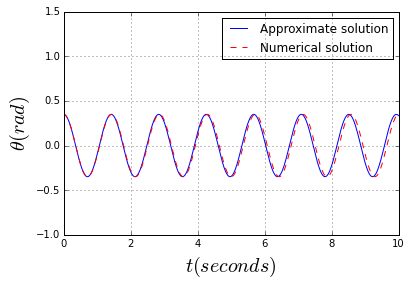

In [17]:
plt.plot(t,theta_app(t),'b-',label="Approximate solution")
plt.plot(t,theta[:,0],'r--',label="Numerical solution")
plt.xlabel(r'$t (seconds)$',fontsize=20)
plt.ylabel(r'$\theta (rad)$',fontsize=20)
plt.ylim(-1,1.5)
plt.grid()
plt.legend()
plt.show()

It looks like the approximate solution does a decent job for the first few cycles, but starts to diverge later on.  What if we start it off at a bigger initial angle?

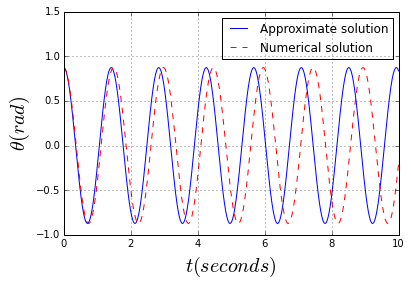

In [12]:
th0 = 50.*np.pi/180 # 50 degrees

th_init = np.array([th0, omega0]) # initial values
theta = odeint(deriv,th_init,t)

plt.plot(t,theta_app(t),'b-',label="Approximate solution")
plt.plot(t,theta[:,0],'r--',label="Numerical solution")
plt.xlabel(r'$t (seconds)$',fontsize=20)
plt.ylabel(r'$\theta (rad)$',fontsize=20)
plt.ylim(-1.,1.5)
plt.grid()
plt.legend()
plt.show()

Much more significant deviations appear for large angles.  To get a good estimate of the motion of a simple pendulum over a wide range of motion, numerical solutions are the way to go.  The nonlinear behavior will lead to some surprising physical results.  You will get the chance to explore this behavior in the exercises.  Be prepared to have your mind blown.

---

## One last example - coupled differential equations

There are many examples of problems that involve entangled differential equations.  One such example is the so-called Lotka-Volterra "Predator-Prey" model.

A predator-prey model describes the interactions of two species in an ecosystem. For this example, let’s consider lions and zebras. If we consider a group of lions and zebras that don’t interact with any species but each other, we can write a system of equations to govern their populations as follows:

$$
\frac{dZ}{dt} = \alpha Z - \beta ZL,\\
\frac{dL}{dt} = \epsilon\beta ZL - \gamma L,
$$

where $L$ and $Z$ are the populations of lions and zebras, respectively, and the equations represent the rate of change of those populations given the rates of birth and death of each species.  

The death rates are controlled by the rate of lions consuming zebras and starving to death from lack of (zebra) food.  The initial conditions for the given situation are the starting populations:

$$
L(0) = L_0,\\
Z(0) = Z_0,
$$

and the parameters are

* $\alpha$: growth rate of zebras in the absence of lions to prey on them (units of [1/years])
* $\gamma$: death rate of lions in the absence of zebras to eat (units of [1/years])
* $\beta$: death rate of zebras per encounter with a lion (units of [1/lions/years])
* $\epsilon$: efficiency of producing lions from consumed zebras (units of [lions/zebras])


In the absence of lions, $L$ = 0, the zebra population grows exponentially, 

$$
\frac{dZ}{dt} = \alpha Z\\
Z(t) = Z_0e^{\alpha t}
$$

Likewise, in the absence of zebras, the lion population decays exponentially because there is nothing to eat!

$$
\frac{dL}{dt}  = -\gamma L\\
L(t) = L_0e^{-\gamma t}
$$

When our ecosystem starts off with a population of both lions and zebras, the situation is more complicated.  We have a set of coupled differential equations that need to be solved numerically.  

Given the following parameters, we could solve this system of equations to determine the maximum and minimum lion and zebra populations over the course of 50 years if the initial populations are $Z_0$ = 200 and $L_0$ = 50.


* $\alpha$ = 0.7 per year
* $\gamma$ = 0.5 per year
* $\beta$ = 0.007 per lion per year
* $\epsilon$ = 0.1 lions per zebra



In [2]:
# we want to solve the system dy/dt = f(y, t)
def derivPP(y,t):
    
    alpha = 0.7
    gamma = 0.5
    beta = 0.007
    eps = 0.1
    
    Zi = y[0]
    Li = y[1]
    
    dZdt = alpha*Zi - beta*Zi*Li
    dLdt = eps*beta*Zi*Li - gamma*Li
    
    return np.array([ dZdt, dLdt ])


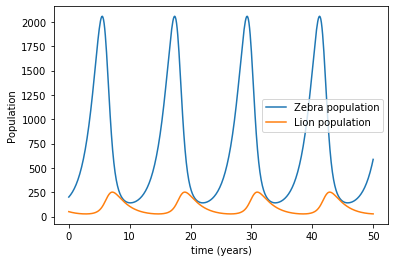

In [5]:
#50 year span
t = np.arange(0.,50.+0.1,0.1)

#initial conditions
Z0 = 200
L0 = 50

#pass the function deriv to the solver with initial values and integration variable
result = odeint(derivPP,np.array([Z0,L0]),t)

Z = result[:,0]
L = result[:,1]

plt.plot(t,Z,label="Zebra population")
plt.plot(t,L,label="Lion population")
plt.xlabel("time (years)")
plt.ylabel("Population")
plt.legend()
plt.show()

The cyclic pattern in their populations reflects the competition between lions and zebras.  When the lion population declines, the zebra population explodes.  As long as there are lions left, they can multiply until their population reaches a critical mass and the zebra population crashes.

Another way we can explore how the populations influence each other is with a parametric phase plot.  Each cycle forms a closed loop.  By varying the initial conditions, one can explore the interplay between the populations.  

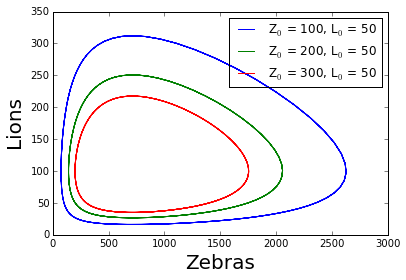

In [24]:
res1 = odeint(derivPP,np.array([100,50]),t)
res2 = odeint(derivPP,np.array([300,50]),t)
plt.plot(res1[:,0],res1[:,1],label="Z$_0$ = 100, L$_0$ = 50")
plt.plot(Z,L,label="Z$_0$ = 200, L$_0$ = 50")
plt.plot(res2[:,0],res2[:,1],label="Z$_0$ = 300, L$_0$ = 50")
plt.xlabel("Zebras",fontsize=20)
plt.ylabel("Lions",fontsize=20)
plt.legend()
plt.show()

The pathlength of the curves is correlated to the length of a cycle.  More zebras means shorter cycles.  Less zebras means longer cycles.  How might these curves change if we varied $\alpha$, $\beta$, $\gamma$, and $\epsilon$?  And what would the results mean?  There are so many parameters and variations to explore, you could spend an entire career on it.  And some people do just that!

A fun variation on the Lotka-Volterra model is the [Zombie Apocalypse model](http://wiki.scipy.org/Cookbook/Zombie_Apocalypse_ODEINT).  That one is a system of three equations and 5 parameters that accounts for both death and the conversion of people to zombies in the population balance.

---